# Convert SBD Annotations
The SBD dataset is based on Pascal but with additional annotations. The class segmentation annotations along with boundary annotations are stored in ".mat" files. In order to use the annotations for training and validation of FCN, the segmentations are required to be saved as png files, compatible with the validation segmentations. The code below, borrowed from https://github.com/shelhamer/fcn.berkeleyvision.org/tree/master/data/pascal takes care of the conversion.

__NOTE:__ This notebook uses they scipy package tor read mat files. This package is not install in the priming virtual environment. Please run the notebook with a kernel that has scipy installed.

In [1]:
import os
import glob
import numpy as np
import scipy.io

from PIL import Image

In [2]:
def make_palette(num_classes):
    """
    Maps classes to colors in the style of PASCAL VOC.
    Close values are mapped to far colors for segmentation visualization.
    See http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#devkit
    Takes:
        num_classes: the number of classes
    Gives:
        palette: the colormap as a k x 3 array of RGB colors
    """
    palette = np.zeros((num_classes, 3), dtype=np.uint8)
    for k in np.arange(0, num_classes):
        label = k
        i = 0
        while label:
            palette[k, 0] |= (((label >> 0) & 1) << (7 - i))
            palette[k, 1] |= (((label >> 1) & 1) << (7 - i))
            palette[k, 2] |= (((label >> 2) & 1) << (7 - i))
            label >>= 3
            i += 1
    return palette

In [7]:
dataset_dir = '/mnt/storage/Work/datasets/priming/SBD_dataset/benchmark_RELEASE/priming_sdb_dataset/train/'
segmentation_dir = '/mnt/storage/Work/datasets/priming/SBD_dataset/benchmark_RELEASE/priming_sdb_dataset/train/SegmentationClass/'
palette = make_palette(256).reshape(-1)

for kind in ['cls']:#, 'inst'):
    # collect the inputs
    paths = glob.glob('{}/{}/*.mat'.format(dataset_dir, kind))
    ids = [os.path.basename(p)[:-4] for p in paths]
    for i, idx in enumerate(ids):
        if i % 100 == 0:
            print("Converting {}th annotation...".format(i))
        # loading the label
        mat = scipy.io.loadmat('{}/{}/{}.mat'.format(dataset_dir, kind, idx))
        label_arr = mat['GT{}'.format(kind)][0]['Segmentation'][0].astype(np.uint8)
        # saving the label
        label_im = Image.fromarray(label_arr)
        label_im.putpalette(palette)
        label_im.save('{}/{}.png'.format(segmentation_dir, idx))

Converting 0th annotation...
Converting 100th annotation...
Converting 200th annotation...
Converting 300th annotation...
Converting 400th annotation...
Converting 500th annotation...
Converting 600th annotation...
Converting 700th annotation...
Converting 800th annotation...
Converting 900th annotation...
Converting 1000th annotation...
Converting 1100th annotation...
Converting 1200th annotation...
Converting 1300th annotation...
Converting 1400th annotation...
Converting 1500th annotation...
Converting 1600th annotation...
Converting 1700th annotation...
Converting 1800th annotation...
Converting 1900th annotation...
Converting 2000th annotation...
Converting 2100th annotation...
Converting 2200th annotation...
Converting 2300th annotation...
Converting 2400th annotation...
Converting 2500th annotation...
Converting 2600th annotation...
Converting 2700th annotation...
Converting 2800th annotation...
Converting 2900th annotation...
Converting 3000th annotation...
Converting 3100th an

## Check the converted files

In [8]:
import matplotlib.pyplot as plt

[0.        0.5019608 0.7529412]


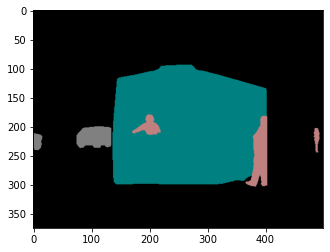

In [13]:
segmentation_dir = '/mnt/storage/Work/datasets/priming/SBD_dataset/benchmark_RELEASE/priming_sdb_dataset/train/SegmentationClass/'
img_name = segmentation_dir + '2011_003109.png'
img = plt.imread(img_name)
plt.figure()
plt.imshow(img)
print(np.unique(img[:,:,0]))

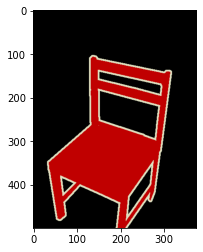

In [26]:
pascal_dir = '/mnt/storage/Work/datasets/priming/SBD_dataset/benchmark_RELEASE/Pascal2011/TrainVal/VOCdevkit/VOC2011/SegmentationClass/'
img_name = '2010_005800.png'
img = plt.imread(pascal_dir + img_name)
plt.figure()
plt.imshow(img)